In [3]:
import pandas as pd 
import matplotlib
from csv import DictReader

In [4]:
# TODO
    # Compare the top ten baby names of 2018 to the top ten baby names of 1918
    # Plot the top ten in 2018 against those same names in 1918
    # Plot the tope ten in 1918 against the same names in 2018


# Analysis of 2018 Baby Names

In [11]:
# Read CSV Data Generated from Social Security Administration on Most Popular Baby Names - 2018
SURVEY_DATA_CSV_FILE_PATH: str = "../data/yob2018.csv"
data = pd.read_csv(SURVEY_DATA_CSV_FILE_PATH, names = ['name', 'sex', 'occurence'])

## Analysis of Male Names

In [20]:
# ===Mask Female Data ====
# Only returns values that are associated with assigned sex of male at birth. 
male_data = data.mask(data['sex'] == 'F')
male_data = male_data.dropna()
top_ten_male = male_data.head(10)
top_ten_male

,name,sex,occurence
18100,Liam,M,19915.0
18101,Noah,M,18350.0
18102,William,M,14590.0
18103,James,M,13589.0
18104,Oliver,M,13461.0
18105,Benjamin,M,13444.0
18106,Elijah,M,12956.0
18107,Lucas,M,12631.0
18108,Mason,M,12473.0
18109,Logan,M,12401.0


In [34]:
twentyeighteen_names = list(top_ten_male.name)
type(twentyeighteen_names)

list

### 2018 Top Ten Male Names Analysis

<BarContainer object of 10 artists>

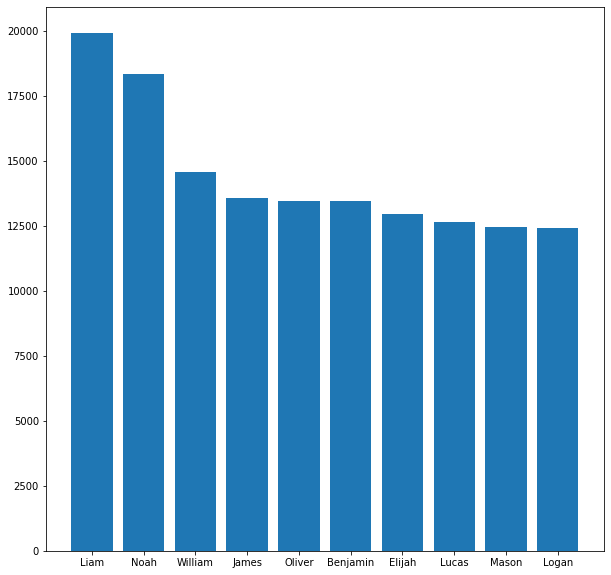

In [16]:
matplotlib.rcParams['figure.figsize'] = [10, 10]
from matplotlib import pyplot as plt 
plt.bar(top_ten_male.name, top_ten_male.occurence)

### First Letter Analysis - 2018

In [ ]:
# Sort the data by top values 
male_data = male_data.sort_values('occurence', ascending=False)

# -- Determine occurence of the first initial --
result: dict[str, int] = {}
for name in male_data["name"]:
    if name[0] not in result:
        result[name[0]] = 1
    else:
        result[name[0]] += 1      
x = sorted(result.items())
first_letters = dict(x)

In [ ]:
plt.title("Frequencies of First Letters in Male Names 2018")
plt.xlabel("Letters")
plt.ylabel("Counts")
labels: list[str] = list(first_letters.keys())
values: list[int] = list(first_letters.values())
plt.bar(labels, values)

Analysis: Although none of the top ten names had the first letter 'A' nor the first letter 'K' these two letters were still the top first name initials of males born in 2018.


## 2018 Female Name Analysis

### Top Ten Female Names

In [ ]:
# === Mask Male Data ===
female_data = data.mask(data['sex'] == 'M').dropna()
top_ten_female = female_data.head(10)
top_ten_female

In [ ]:
matplotlib.rcParams['figure.figsize'] = [10, 10]
from matplotlib import pyplot as plt 
plt.bar(top_ten_female.name, top_ten_female.occurence)

### First Letter Analysis Female Names - 2018

In [ ]:
# Sort the data by top values 
female_data = female_data.sort_values('occurence', ascending=False)
female_data = female_data.drop_duplicates()
# TODO 
# Clean the female_data database. 
# One of the letters in the database is in the wrong format. 

# -- Determine occurence of the first initial --
result_female: dict[str, int] = {}
for name in female_data["name"]:
    if name[0] not in result_female:
        result_female[name[0]] = 1
    else:
        result_female[name[0]] += 1      
x = sorted(result_female.items())
first_letters_females = dict(x)
female_data

In [ ]:
plt.title("Frequencies of First Letters in Male Names 2018")
plt.xlabel("Letters")
plt.ylabel("Counts")
labels: list[str] = list(first_letters_females.keys())
values: list[int] = list(first_letters_females.values())
plt.bar(labels, values)

# Comparison with 1918 Data

In [7]:
NINETEEN_EIGHTEEN_FILE_PATH = "../data/yob1918.csv"
nineteen_eighteen_data = pd.read_csv(NINETEEN_EIGHTEEN_FILE_PATH, names = ['name', 'sex', 'occurence'])

## Top Ten Male Data

In [8]:
older_male_data = nineteen_eighteen_data.mask(nineteen_eighteen_data['sex'] == 'F')
older_male_data = older_male_data.dropna()
older_top_ten_male = older_male_data.head(10)
older_top_ten_male

,name,sex,occurence
5585,John,M,56559.0
5586,William,M,45290.0
5587,James,M,42117.0
5588,Robert,M,40619.0
5589,Charles,M,26921.0
5590,George,M,26318.0
5591,Joseph,M,26262.0
5592,Edward,M,19490.0
5593,Frank,M,17017.0
5594,Thomas,M,13910.0


In [115]:
import warnings
warnings.simplefilter(action = 'ignore')
nineteen_eighteen_comparison = older_male_data[older_male_data['name'].isin(twentyeighteen_names)]
nineteen_eighteen_comparison.loc[3] = ['Liam', 'M', 0]
nineteen_eighteen_comparison = nineteen_eighteen_comparison.sort_values(by = 'name')
nineteen_eighteen_comparison = nineteen_eighteen_comparison.reset_index().drop(['index'], 1)
nineteen_eighteen_comparison

,name,sex,occurence
0,Benjamin,M,2431.0
1,Elijah,M,264.0
2,James,M,42117.0
3,Liam,M,0.0
4,Logan,M,85.0
5,Lucas,M,52.0
6,Mason,M,116.0
7,Noah,M,247.0
8,Oliver,M,1248.0
9,William,M,45290.0


In [113]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
top_ten_male = top_ten_male.sort_values(by = 'name')
top_ten_male = top_ten_male.reset_index().drop(['index'], 1)
top_ten_male

,name,sex,occurence
0,Benjamin,M,13444.0
1,Elijah,M,12956.0
2,James,M,13589.0
3,Liam,M,19915.0
4,Logan,M,12401.0
5,Lucas,M,12631.0
6,Mason,M,12473.0
7,Noah,M,18350.0
8,Oliver,M,13461.0
9,William,M,14590.0


In [116]:
top_ten_male = top_ten_male.set_index('name')
nineteen_eighteen_comparison = nineteen_eighteen_comparison.set_index('name')

In [117]:
top_ten_male['occurence_old'] = nineteen_eighteen_comparison['occurence']
top_ten_male

,sex,occurence,occurence_old
name,,,
Benjamin,M,13444.0,2431.0
Elijah,M,12956.0,264.0
James,M,13589.0,42117.0
Liam,M,19915.0,0.0
Logan,M,12401.0,85.0
Lucas,M,12631.0,52.0
Mason,M,12473.0,116.0
Noah,M,18350.0,247.0
Oliver,M,13461.0,1248.0


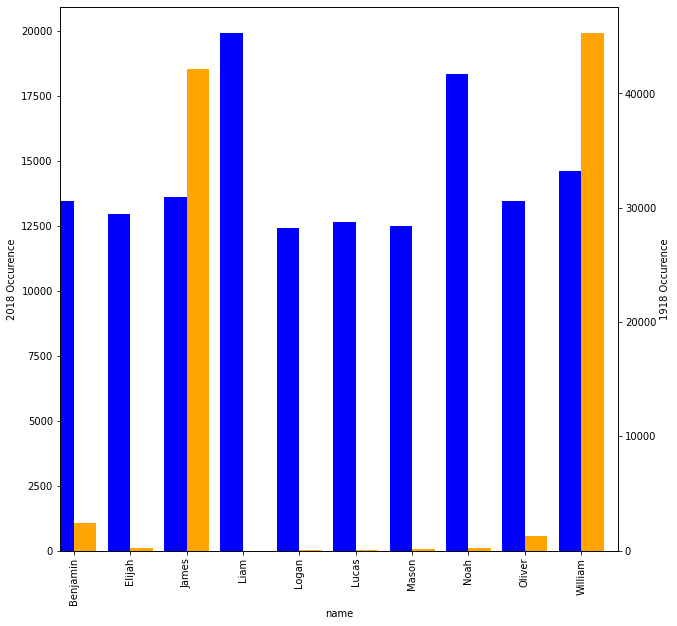

In [118]:

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

top_ten_male.occurence.plot(kind='bar', color='blue', ax=ax, width=width, position=1)
top_ten_male.occurence_old.plot(kind='bar', color='orange', ax=ax2, width=width, position=0)

ax.set_ylabel('2018 Occurence')
ax2.set_ylabel('1918 Occurence')

plt.show()

<BarContainer object of 10 artists>

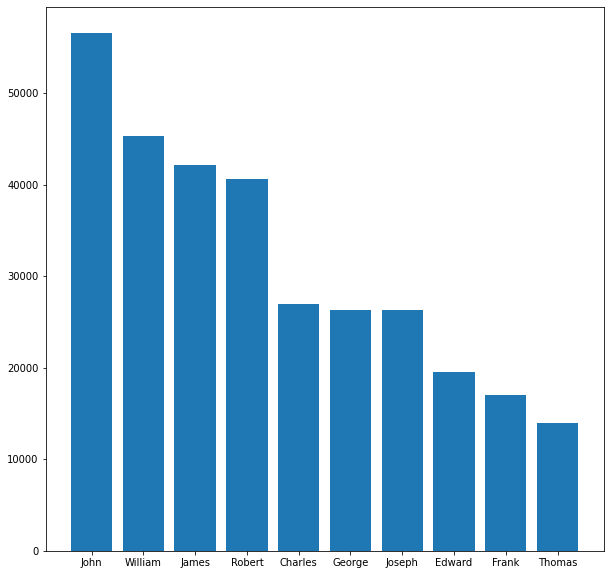

In [10]:
matplotlib.rcParams['figure.figsize'] = [10, 10]
from matplotlib import pyplot as plt 
plt.bar(older_top_ten_male.name, older_top_ten_male.occurence)